# T3 Wrangling spike-trains

## Toy example of a light sensitive neuron

Let us consider a neuron, which is alive, that is capable of sending spikes. This particular neuron will generally not send any spikes in the dark, and this neuron will send spikes if you shine green light (e.g. at wavelength 550 nm) on it. Let's also assume that we have a recording electrode near the soma (the point where this neuron sends spikes). Through this electrode, we can record when this neuron is firing over time. 
The result of this recording is a list of `0`s for when no spike was emitted and `1`s for when a spike was emitted. This array is saved in the variable `spikeTrain`.

In [1]:
import numpy as np

spikeTrain = np.array([0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0])

This neuron is spiking when illuminated with green light. So let's indicate the time points during which the green light in on in bold : [0,1,2,3,4,**5,6,7,8,9,10,11,12,13,**14,15,16,17,18,19,20]. Each time point above is in unites of milliseconds, which means that the light started at 5 ms and lasted until 13 ms. It stayed on for 9 ms. 

#### Basic questions about the spike train

First, we will extract some basic information about the spike train. 

* How many spikes did the neuron fire in total during the recording period? 
* How long is the recording period? 
* What is the average firing rate of the neuron during the recording period? 
* At which time points do the spikes occur?

In [5]:
print('The total number of spikes is :',np.sum(spikeTrain))
print('The length of the recording is :',len(spikeTrain), 'ms')
# note that ms have to be converted in seconds for calculating the rate
print('The average firing rate is :', np.sum(spikeTrain)*1000./len(spikeTrain) , 'spikes/s') 

# obtain spike-times with numpy where function
spikeTimes = np.where(spikeTrain==1)

print('The spike-times are : ',spikeTimes)
# alternative solution with for loop
for n in np.arange(len(spikeTrain)):
    if spikeTrain[n]==1:
        print('The neuron fired at spikes at ',n,'ms')



The total number of spikes is : 4
The length of the recording is : 21 ms
The average firing rate is : 190.47619047619048 spikes/s
The spike-times are :  (array([ 9, 11, 13, 17]),)
The neuron fired at spikes at  9 ms
The neuron fired at spikes at  11 ms
The neuron fired at spikes at  13 ms
The neuron fired at spikes at  17 ms


#### Response latency

The time it takes the neuron to be reponsive, i.e., for a neuron to spike in response to a stimulus - in our case green light - is known as the **response latency**. 

* Calculate the latency to first spike after stimulus onset for the given spike-train. 

In [6]:
# we look at the first spike during the stimulus presentation
# we substract the stimulus onset - at 5 ms - to get the response latency
print('the response latency is :',spikeTimes[0][0]-5,'ms')

the response latency is : 4 ms


#### Raster plot

Let't make a plot and illustrate the spike-train. The plot the spiking activity we need to know the time of every spike in the array. People sometimes called these the *spike timestamps*, or *spiketimes*. To plot the spikes, we will use the common visualization method of a **spike raster plot**. In such a plot, each spike is represented as a vertical line, at the time when it occurred, with time on the x-axis.

* Plot the raster plot of the spiketrain using the `matplotlib.pyplot` `vlines()` function. This function takes the x-locations as well as the minimum value and the maximum value of the vertial lines as input argument. 
* Mark the stimulus period with as green shaded region in the plot by making use of the `matplotlib.pyplot` `axvspan()` function (input arguments are the x start and stop values). 

(0, 20)

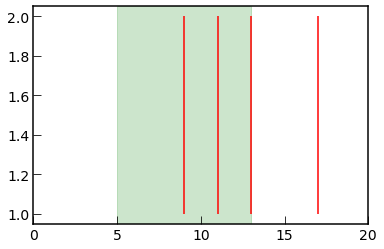

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.vlines(spikeTimes,1,2,color='red')
plt.axvspan(5,13,color='green',alpha=0.2)
plt.xlim(0,20)

#### Multiple recordings of the same neuron

What if there is some mechanism inside the neuron that causes it to spike highly unreliably? What if we are recording the signals of this neuron in a noisy environment? To address this, we would need to stimulate and record the neuron multiple times (ideally many times). 

Below are the spike-trains of the neuron from ten identical recordings, i.e., the green light simulus was on always during the [5,13] ms time window. 

In [10]:
tenSpikeTrains = np.array([[0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0],\
                  [0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0],\
                  [0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],\
                  [0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0],\
                  [0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0],\
                  [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0],\
                  [0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0],\
                  [1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],\
                  [0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0],\
                  [0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0]])

#### Visualize the recordings in a raster plot

In order to make a raster plot of the data from **all** the trials, let's use a similar method we used for the data from a single trial, except that we cycle through each array in the array. 

* Plot a raster-plot of all the data using a `for` loop and the `vlines()` visualization function. 
* Indicate the stimulus period in the plot. 

(0, 20)

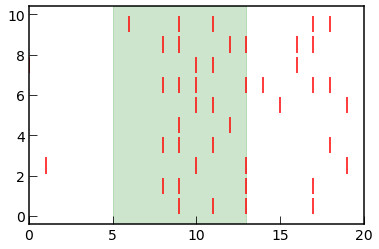

In [11]:
for i in range(len(tenSpikeTrains)):
    spikeTimes = np.where(tenSpikeTrains[i]==1)
    plt.vlines(spikeTimes,i+0.1,i+0.9,color='red')
plt.axvspan(5,13,color='green',alpha=0.2)
plt.xlim(0,20)

## The end